In [3]:
import numpy as np
import matplotlib.pyplot as pyplot

In [1]:

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)

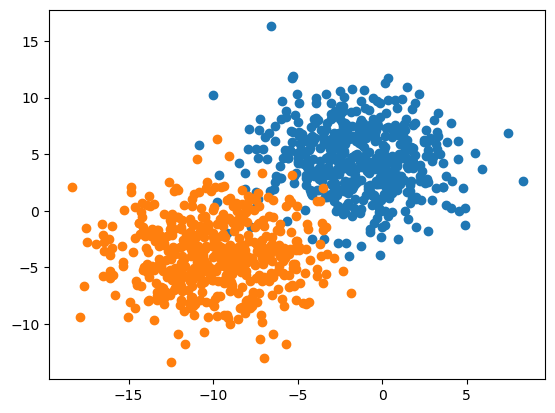

In [4]:
for class_value in range(2):
  # get row indexes for samples with this class
  row_ix = np.where(y == class_value)
  # create scatter of these samples
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

In [5]:
# define the class distribution
proportions = {0:5000, 1:5000}

In [8]:
n_classes = len(proportions)

largest = max(v for k,v in proportions.items())
n_samples = largest * n_classes

In [10]:
X_list, y_list = list(), list()
for k,v in proportions.items():
  row_ix = np.where(y == k)[0]
  selected = row_ix[:v]
  X_list.append(X[selected, :])
  y_list.append(y[selected])

In [14]:
# create a dataset with a given class distribution
from numpy import hstack, unique, vstack, where

def get_dataset(proportions):
  # determine the number of classes
  n_classes = len(proportions)
  # determine the number of examples to generate for each class
  largest = max([v for k,v in proportions.items()])
  n_samples = largest * n_classes
  # create dataset
  X, y = make_blobs(n_samples=n_samples, centers=n_classes, n_features=2, random_state=1,
      cluster_std=3)
  # collect the examples
  X_list, y_list = list(), list()
  for k,v in proportions.items():
    row_ix = np. where(y == k)[0]
    selected = row_ix[:v]
    X_list.append(X[selected, :])
    y_list.append(y[selected])
  return vstack(X_list), hstack(y_list)


def plot_dataset(X,y):
  # create scatter plot for samples from each class
  n_classes = len(unique(y))
  for class_value in range(n_classes):
    # get row indexes for samples with this class
    row_ix = where(y == class_value)[0]
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(class_value))
  # show a legend
  pyplot.legend()
  # show the plot
  pyplot.show()

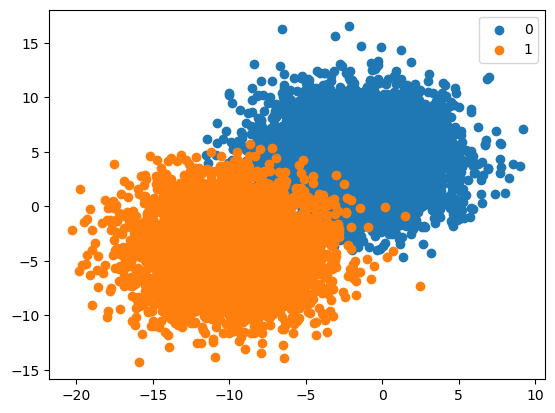

In [15]:
# generate dataset
X, y = get_dataset(proportions)
# plot dataset
plot_dataset(X, y)